# Importing Libraries

In [1]:
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import pyspark.pandas as ps
from pyspark import SparkContext
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime
import scipy
import seaborn as sns
import time
from statistics import mean
import findspark
findspark.init()
import random
import pyspark
from pyspark.sql import SparkSession
import pyspark.pandas as ps
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

### Reading the Dataset

In [2]:
#Using spark because with pd.read_csv had problems with the characters of some countries
#(even specifyng the encoding like utf-8, latin-1, etc)
df0 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/USvideos.csv', header=True, inferSchema=True)
df1 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/CAvideos.csv', header=True, inferSchema=True)
df2 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/DEvideos.csv', header=True, inferSchema=True)
df3 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/FRvideos.csv', header=True, inferSchema=True)
df4 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/GBvideos.csv', header=True, inferSchema=True)
df5 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/INvideos.csv', header=True, inferSchema=True)
df6 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/JPvideos.csv', header=True, inferSchema=True)
df7 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/KRvideos.csv', header=True, inferSchema=True)
df8 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/MXvideos.csv', header=True, inferSchema=True)
df9 = spark.read.csv('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/RUvideos.csv', header=True, inferSchema=True)

In [3]:
#I like pandas :)
df0 = df0.toPandas()
df1 = df1.toPandas()
df2 = df2.toPandas()
df3 = df3.toPandas()
df4 = df4.toPandas()
df5 = df5.toPandas()
df6 = df6.toPandas()
df7 = df7.toPandas()
df8 = df8.toPandas()
df9 = df9.toPandas()

In [4]:
df_json0 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/US_category_id.json')
df_json1 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/CA_category_id.json')
df_json2 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/DE_category_id.json')
df_json3 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/FR_category_id.json')
df_json4 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/GB_category_id.json')
df_json5 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/IN_category_id.json')
df_json6 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/JP_category_id.json')
df_json7 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/KR_category_id.json')
df_json8 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/MX_category_id.json')
df_json9 = pd.read_json('C:/Users/jomus/OneDrive/Escritorio/Aprendizaje Útil/IBM_Advanced_Data_Science/RU_category_id.json')

In [5]:
#store dataframes In one list for iteration purposes and then just delete the single ones for memory
df_json = [df_json0, df_json1, df_json2, df_json3, df_json4, df_json5, df_json6, df_json7, df_json8, df_json9]
df = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]

del df0, df1, df2, df3, df4, df5, df6, df7, df8, df9,
del df_json0, df_json1, df_json2, df_json3, df_json4, df_json5, df_json6, df_json7, df_json8, df_json9

### Looking the Category_id names from the json file

In [6]:
#df_json.head() --> after looking this, I realize that the important part is...
df_json[0]["items"][0] #this is the important part of the json, im just looking the first row to see the elements.

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [7]:
#After looking the df_json, I wanted to see what category means each ID
#I want to store the values too because probably im gonna need them
#Also, I want to check that for every country there are the sames category ID.
ID = []
for i in range(len(df_json)):
    print("analizando el df numero: ", i, "\n")
    list_id = []
    list_category = []
    for j in range(len(df_json[i])):

        identificador = df_json[i]["items"][j]["id"]
        categoria = df_json[i]["items"][j]["snippet"]["title"]

        list_id.append(identificador)
        list_category.append(categoria)
        
        
        print(identificador, ":", categoria)
    x = zip(list_id, list_category)
    ID.append(list(x))

analizando el df numero:  0 

1 : Film & Animation
2 : Autos & Vehicles
10 : Music
15 : Pets & Animals
17 : Sports
18 : Short Movies
19 : Travel & Events
20 : Gaming
21 : Videoblogging
22 : People & Blogs
23 : Comedy
24 : Entertainment
25 : News & Politics
26 : Howto & Style
27 : Education
28 : Science & Technology
29 : Nonprofits & Activism
30 : Movies
31 : Anime/Animation
32 : Action/Adventure
33 : Classics
34 : Comedy
35 : Documentary
36 : Drama
37 : Family
38 : Foreign
39 : Horror
40 : Sci-Fi/Fantasy
41 : Thriller
42 : Shorts
43 : Shows
44 : Trailers
analizando el df numero:  1 

1 : Film & Animation
2 : Autos & Vehicles
10 : Music
15 : Pets & Animals
17 : Sports
18 : Short Movies
19 : Travel & Events
20 : Gaming
21 : Videoblogging
22 : People & Blogs
23 : Comedy
24 : Entertainment
25 : News & Politics
26 : Howto & Style
27 : Education
28 : Science & Technology
30 : Movies
31 : Anime/Animation
32 : Action/Adventure
33 : Classics
34 : Comedy
35 : Documentary
36 : Drama
37 : Family
3

In [8]:
#Checking that the Categorys ID for every country are the same
for i in range(len(ID)-1):
    for j in range(i, len(ID)):
        print(i, j)
        print(ID[i] == ID[j])

0 0
True
0 1
False
0 2
False
0 3
False
0 4
False
0 5
False
0 6
False
0 7
False
0 8
False
0 9
False
1 1
True
1 2
True
1 3
True
1 4
True
1 5
True
1 6
True
1 7
True
1 8
True
1 9
True
2 2
True
2 3
True
2 4
True
2 5
True
2 6
True
2 7
True
2 8
True
2 9
True
3 3
True
3 4
True
3 5
True
3 6
True
3 7
True
3 8
True
3 9
True
4 4
True
4 5
True
4 6
True
4 7
True
4 8
True
4 9
True
5 5
True
5 6
True
5 7
True
5 8
True
5 9
True
6 6
True
6 7
True
6 8
True
6 9
True
7 7
True
7 8
True
7 9
True
8 8
True
8 9
True


In [9]:
#Ok, so it seems that only the categories of US (the first element) is different to the others.
#Let's compare the first element with just the second one

print("Numbers of categories US|CA............", len(ID[0]), "|", len(ID[1]))
print("Categories in common between US|CA..........",len(set(ID[0])&set(ID[1])))

Numbers of categories US|CA............ 32 | 31
Categories in common between US|CA.......... 31


In [10]:
#There is one category in the US that is not in the others:
[x for x in ID[0] if x not in ID[1]]

[('29', 'Nonprofits & Activism')]

## Ok, so that was to ensure that the categories labels were consistent within datasets.
That was important to avoid confusions in the "category" feature. For example, in US the ID 1 could be for "shows" but for RU could be "sports". But is all consistent so its ok. Just important to know that there is a category number 29 in the US that doesn't exists in the others countries

Now lets see if the columns are consistent too.

In [11]:
#Checking that the columns of the datasets are the same
for i in range(len(df)-1):
    for j in range(i, len(df)):
        print(i, j)
        print(list(df[i].columns) == list(df[j].columns))

0 0
True
0 1
True
0 2
True
0 3
True
0 4
True
0 5
True
0 6
True
0 7
True
0 8
True
0 9
True
1 1
True
1 2
True
1 3
True
1 4
True
1 5
True
1 6
True
1 7
True
1 8
True
1 9
True
2 2
True
2 3
True
2 4
True
2 5
True
2 6
True
2 7
True
2 8
True
2 9
True
3 3
True
3 4
True
3 5
True
3 6
True
3 7
True
3 8
True
3 9
True
4 4
True
4 5
True
4 6
True
4 7
True
4 8
True
4 9
True
5 5
True
5 6
True
5 7
True
5 8
True
5 9
True
6 6
True
6 7
True
6 8
True
6 9
True
7 7
True
7 8
True
7 9
True
8 8
True
8 9
True


In [12]:
#And now with the datatypes:
dfs_datatypes = []
for i in range(len(df)):
    list_datatypes = []
    for j in range(len(df[i].columns)):
        list_datatypes.append(type(df[i][df[i].columns[j]][0]))
    dfs_datatypes.append(list_datatypes)

In [13]:
dfs_datatypes

[[str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str],
 [str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str],
 [str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str],
 [str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str],
 [str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str],
 [str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  numpy.float64,
  str,
  bool,
  bool,
  bool,
  str],
 [str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  numpy.float64,
  str,
  bool,
  bool,
  bool,
  str],
 [str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  bool,
  bool,
  bool,
  str],
 [str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  str,
  st

## Well... there are some problems with the datatypes of the dataframes. 
In first place, not all the dataframes have the same datatypes for all the columns.
In second place, there are some dataframes which has only "str" types, which is not correct because of there are "time" columns, boolean columns, and int columns. So, lets fix it in a way that all the dataframes have the same datatypes.

In [14]:
#Because I Know that all the dataframes contains the same columns (columns but no equal datatypes). Im going to take as 
#reference the first dataframe to stablish the datatypes that Im going to fix:
df[0].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"""last week tonight trump presidency""|""last wee...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"""racist superman""|""rudy""|""mancuso""|""king""|""bac...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"""rhett and link""|""gmm""|""good mythical morning""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"""ryan""|""higa""|""higatv""|""nigahiga""|""i dare you""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### The datatypes should be like:

**video_id** --> str  
**trending_date** --> datetime  
**title** --> str  
**channel_title** --> str  
**publish_time** --> datetime  
**tags** --> **At this point, I'm not intending to do NPL so probably Im just going to drop this column**  
**views** --> int  
**likes** --> int  
**dislikes** --> int  
**comment_count** --> int  
**thumnail_link** --> **this variable is a link to the image of the preview of the video. Not going to use this.**  
**comments_disabled** --> bool  
**rating_disabled** --> bool  
**video_error_or_removed** --> bool  
**description** --> **Same as tag**  

# FIXING THE DATATYPES:

**Starting with the datetimes**

In [15]:
#Changing the "trending_date" column format to each df
print(list(np.unique(df[3]["trending_date"].astype(str))))

[' #24/7', ' #360', ' #JUSTICE', ' #Johnnyhallyday', ' #LaeticiaHallyday', ' #Laeticiahallyday', ' #Laeti\xadciaHally\xadday', ' #LauraSmet', ' #MeghanMarkle', ' #cause', ' 2014', ' 2015', ' 2016', ' 2017', ' AP employs the latest technology to collect and distribute content - we have daily uploads covering the latest and breaking news in the world of politics', ' Alain Tourret et Patrick Mignola.', ' Alek Skarlatos et Spencer Stone', ' Audi a présenté une version camouflée de son Q6 e-tron', ' Avant que j’ou\xadblie', ' Bella Hadid', ' Berlin était une ville magnifique', ' Capitol Records  R&B/Soul', ' Caroline Roux et Axel Tarlé', " Closer revient sur le soir de la mort de Johnny Hallyday. Et révèle la première réaction de Laeticia lorsque le médecin a prononcé les mots : C'est fini", " Code des États-Unis (articles 107-118 de la loi sur le droit d'auteur", ' David Hally\xadday et leur père', ' David Hally\xad\xadday a entamé une nouvelle tour\xad\xadnée française au casino de Pougue

In [16]:
print(list(np.unique(df[3]["publish_time"].astype(str))))

[' #JohnnyHallyday', ' 5 blocs se partagent l’affiche avec des puissances comprises entre 75 et 130 ch.  L’équipement en profite aussi pour faire un bond. Allons faire un tour du côté de la planche de bord… Un écran tactile de 8’’', ' 65 ans', ' Adolf Hitler', ' Byzantins', ' Eddy Mitchell', ' Ford a écoulé un peu plus de 200.000 Focus. Au début des années 2000', ' François Ruffin et Rebecca Manzoni', ' Husqvarna : tout le monde propose des nouveaux modèles.', ' Jacque\xadline devient sa cuisi\xadnière atti\xadtrée. Elle restera six ans à son service.Selon Nounou', ' Jérôme Fritel et Marc Roche passent au crible cet empire financier au-dessus des lois.', ' Kim Kardashian and more.', ' Liane Foly a elle aussi voulu adresser quelques mots sur son amie de longue date en direct sur Europe 1. Mais pour la chanteuse', ' Manon', ' NEYMAR REAL MADRID', ' Sterling K. Brown', " Warner Music lui avait accordé un chèque alors que le dernier album du Taulier n'était pas encore terminé. A l'heure ac

### The first problem I see is that in the column "trending date"...
there are values that are not date. ¿How to handle them?. Affortunaly the dataset seems the be order by the trending_date. So in that cases, Im going to replace them with last date available. altought This is not a 100% accuracy way to replace them with the actual date, it will be easy and precise enough :)

### In the other hand, to the "publish_time"...
The format it's a little bit different, so i'm going fix it in other cell. Here is a problem to handle the "NaT" values, because the column is not in order, so I cannot just replace it with the last reference date. ¿How to handle it? ¿Maybe assume that the publish date its the same as trending date? Maybe that is not so accurate. For the moment, I'll leave it as it is.

In [17]:
#FIXING THE TRENDING_DATE_FORMAT

#for every dataframe, lets do this...
for j in range(len(df)):
    
    #Change the format, if the value is not in the y.d.m format, then set it no naT (not a time)
    df[j]['trending_date'] = pd.to_datetime(df[j]['trending_date'], format = "%y.%d.%m", errors='coerce')
    
    #Set a reference date
    reference_date = df[j]["trending_date"][0]
    for i in range(len(df[j])):
        
        #So if the value is a date, then update the reference date
        if type(df[j]["trending_date"][i]) == type(reference_date):
            reference_date = df[j]["trending_date"][i]
        
        #if the value is not a date, then replace it for the reference date, and update the reference date
        elif type(df[j]["trending_date"][i]) != type(reference_date):
            df[j]["trending_date"][i] = reference_date
            #updating the reference_date:
            reference_date = df[j]["trending_date"][i]

C:\Users\jomus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Now the publish time. 

The format here is different, for example: "2017-11-13T17:13:01.000Z", for those values that are actually a date. For those who's not, it should be setting as "NaT" (not a time). I just whant the year, month and day, the other part is just annoying. Like every value that is a date follows that format, For all the values im just going to reduce the string to the first 10 characters

In [18]:
#FIXING PUBLISH_TIME
#NOTE THAT I LEAVE THE NAT VALUES AS IT IS
for i in range(len(df)):
    df[i]["publish_time"] = df[i]["publish_time"].str.slice(stop=10)
    df[i]["publish_time"] = pd.to_datetime(df[i]["publish_time"], format = "%Y-%m-%d", errors='coerce')    

### For now, it's ok for dates, lets continue with the "int's"

That is: category_id, views, likes, dislikes and comment_count

In [19]:
for i in range(len(df)):
    df[i]["category_id"] = pd.to_numeric(df[i]["category_id"], downcast='integer', errors='coerce')
    df[i]["views"] = pd.to_numeric(df[i]["views"], downcast='integer', errors='coerce')
    df[i]["likes"] = pd.to_numeric(df[i]["likes"], downcast='integer', errors='coerce')
    df[i]["dislikes"] = pd.to_numeric(df[i]["dislikes"], downcast='integer', errors='coerce')
    df[i]["comment_count"] = pd.to_numeric(df[i]["comment_count"], downcast='integer', errors='coerce')

In [20]:
for i in range(len(df[0])):
    print(df[0]["comments_disabled"][i])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
None
None
None
None
None
None
None
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F

False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
None
None
None
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
None
False
False
True
False
False
False
False
False
None
None
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
None
False
False
False
False
None
None
None
None
True
None
None
None
None
None
None
None
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

False
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
None
None
False
False
False
True
False
None
None
False
False
False
False
False
False
False
False
False
False
False
False
None
None
None
None
None
None
None
None
None
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

Note that here, there are still nan values. Im going to see later how to handle them

## But now, let's continue with the "booleans"
This is: comments_disabled, ratings_disabled, video_error_or_removed

In [21]:
for i in range(len(df)):
    df[i]['comments_disabled'] = df[i]['comments_disabled'].map({'True': True, 'False': False})
    df[i]['ratings_disabled'] = df[i]['ratings_disabled'].map({'True': True, 'false': False})
    df[i]['video_error_or_removed'] = df[i]['video_error_or_removed'].map({'True': True, 'False': False})

In [22]:
df[3]["ratings_disabled"].value_counts(dropna=False)

NaN     45434
True      704
Name: ratings_disabled, dtype: int64

## So now The datatypes are correct. But there are still some nan values. ¿Why i didn't fix that?... Lets talk about something first

Lets remember again something about the datasets. Each element of df: df[0], df[1]... df[len(df)] refers to a certain country. And each of that datasets contains which videos were in the trending section in a certain day for that country. So, each dataset can have more than one row for a video (if that video was in the trending section for more than one day, which is very common). And not only that, A video could be in the trending section in more than one country, at the same or different time. (so, a certain video can be repeated in the same dataset and between datasets)

Here is where I want to think a bit on the datascience project. In a first hand, I already tried to predict how many days could be a video in the trending section (limited to the US videos. Its available in another notebook I have) But trying with different models and techniques I couldn't reach more than a 11% of accuracy. 

Trying that again with more data (like in this notebook, that have the data of more countries) can be more difficult, because it depends also on the country: for example, the same video can be 5 days in trending on US and 30 in RU. Considering all possible repetitions, if I merge everything into one dataset I would have different predictions for the same video, which is not desirable. These different predictions are due to the fact that the video performs differently in each country. In that case, I should work with each dataset separately... but seeing the lack of success in the case of the US, it may not be worth it.

In [23]:
#Watching how many unique videos are in each dataset.

aprox = 0

for i in range(len(df)):
    x = len(np.unique(df[i]["video_id"]))
    y = len(df[i])
    
    aprox += x
    
    print(x, "|", y, "..............:", round(x/y, 2)*100, "%")

6837 | 48137 ..............: 14.000000000000002 %
25134 | 45560 ..............: 55.00000000000001 %
30728 | 46957 ..............: 65.0 %
31665 | 46138 ..............: 69.0 %
3418 | 43295 ..............: 8.0 %
16535 | 38528 ..............: 43.0 %
13297 | 21445 ..............: 62.0 %
16333 | 36730 ..............: 44.0 %
34249 | 43819 ..............: 78.0 %
35081 | 46260 ..............: 76.0 %


In [24]:
#How many unique videos are in total

lista = list(np.unique(df[0]["video_id"]))
for i in range(1, len(df)):
    lista = lista + list(np.unique(df[i]["video_id"]))

total = len(np.unique(lista))
print(total)


189426


### But... There is other thing I have to decide:

There are four types of data in the dataset. Strings, Ints, Booleans and datetimes. **But more important, we can separate the variables into two: static data and dynamic data.** In this case, static data would be features of the video that doesn't change like: *video_id, title, channel_title, category_id, publish_time, tags, thumbnail link, comments_disabled, ratings_disabled and video_error_or_removed* (those booleans, in fact, can change if, for example, a video was in trending on first day, got a lot of bad comments or dislikes, and then the channel decide to disabled those features because of fear to bad reputation >:(. But that are very rare cases, I mean, those features shouldn't be strictly dynamic). Now, data that changes over time would be: *views, likes, dislikes, comment_count.* **Wich are very important features, and their values changes in consequence with the respective "trending_date" of the video.**

Those last variables are very important because they are very correlated between them, so they can be useful to predict something (How do I know they are correlated? Because in the other notebook I alredy saw that jajaja but don't worry, I will show that again later)

There are two ways I can handle that data. As it is like time series, or find a way to use it as static data. I wouldn't like to use it as time series data, because videos can be just one day on trending section or even ten ore more and I would have a lot of time series of different lenghts (which is a pain). Besides, for classification purposes, It would be more simplier just using static data for machine learning models than using time series, and therefore that allows me to use another static features as input (or output) such as "<*channel_title", "category_id"*, or booleans features or maybe other features than it can be infered from the available data.


**BUTT** how to use those time series as static data? Taking the *views, likes, dislikes, comments_count* from the first day that the video were in trending? the last day in trending? the publish_time? (Altough that is not possible at all, because not all the videos were in trending the same day that were published, so, some videos have no information about *likes, dislikes, views and comment_counts* of the day that there were published.) maybe taking the average? some ratio?

In [25]:
#the idea is that the ratio should not vary too much for most of the videos.
#So, before analize, lets transform the above to a function to use it better:




#this function makes two things:
#First: take one of the dataframes, then takes all the rows available for a random video and calculate the ratios of above
#Second: for each ratio, calculate the variance of it. 

#finally, returns a list with the variances of the ratios of the video. in the same order the ratio were created.

                        # df_number : int from 0-9 (choose one dataframe of the df list) 
def video_ratio_variances(df_number):
    #taking a video as reference

    videos = np.unique(df[df_number]["video_id"])
    temp_data = df[df_number][df[df_number]["video_id"] == videos[random.randint(0, len(videos)) - 1]]
    
    
    #Store the variances of each ratio and the number of days in trending section
    list_variances_ratios = []
    
    #lets take some ratios
    new_data = pd.DataFrame()
    new_data["trending_date"] = temp_data["trending_date"]
    new_data["views_likes"] = temp_data["views"] / temp_data["likes"]
    new_data["views_dislikes"] = temp_data["views"] / temp_data["dislikes"]
    new_data["views_comments"] = temp_data["views"] / temp_data["comment_count"]
    new_data["views_ratings"] = temp_data["views"] / (temp_data["likes"] + temp_data["dislikes"])
    new_data["views_interactions"] = temp_data["views"] / (temp_data["likes"] + temp_data["dislikes"] + temp_data["comment_count"] )
    new_data["likes_dislikes"] = temp_data["likes"] / temp_data["dislikes"]
    new_data["likes_comments"] = temp_data["likes"] / temp_data["comment_count"]
    new_data["dislikes_comments"] = temp_data["dislikes"] / temp_data["comment_count"]
    
    
    list_variances_ratios.append(0 if len(new_data) == 1 else new_data["views_likes"].var())
    list_variances_ratios.append(0 if len(new_data) == 1 else new_data["views_dislikes"].var())
    list_variances_ratios.append(0 if len(new_data) == 1 else new_data["views_comments"].var())
    list_variances_ratios.append(0 if len(new_data) == 1 else new_data["views_ratings"].var())
    list_variances_ratios.append(0 if len(new_data) == 1 else new_data["views_interactions"].var())
    list_variances_ratios.append(0 if len(new_data) == 1 else new_data["likes_dislikes"].var())
    list_variances_ratios.append(0 if len(new_data) == 1 else new_data["likes_comments"].var())
    list_variances_ratios.append(0 if len(new_data) == 1 else new_data["dislikes_comments"].var())
    
    
    #After some codings, I realize that is important too to store the number of days where the video was in trending
    list_variances_ratios.append(len(temp_data))
    
    return list_variances_ratios


In [26]:
#create a sample dataframe
sample_df = pd.DataFrame({"views_likes": [], 
                 "views_dislikes": [],
                 "views_comments": [],
                 "views_ratings": [],
                 "views_interactions": [],
                 "likes_dislikes": [],
                 "likes_comments": [],
                 "dislikes_comments": [],
                  "days_on_trending": []})


#Let's recap. ¿What I'm doing?

#   1.-take a sample of 1000 random videos
#   2.-for each video, calculate some ratios and their evolution over time (depending on the days on trending of that video)
#   3.-for each ratio, calculate the variance,
#   4.-Hope that in general, the variances be low (close to 0 is better)

#why? because that means that in overall the ratios doesn't change a lot over time, meaning that the ratio is a good option
#to transform the dynamic data to static data


for i in range(1000):
    sample_df.loc[i] = video_ratio_variances(random.randint(0,9))[0]    

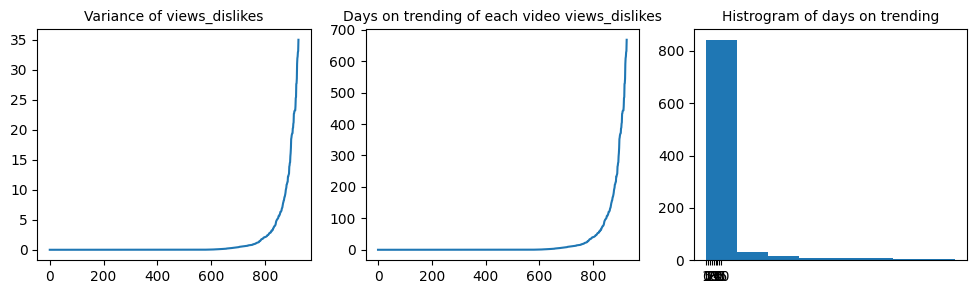

In [27]:
from sklearn.preprocessing import MinMaxScaler
#Choice the column I want to analize For ratio dataset and statistics dataset
#They have to be like in consequence, i mean, for example, taking like/dislike ratio and like + dilikes statistics


ratio_column = sample_df.columns[1] #For simplicity, just go changing this

#remember that the original dataframes contain nan values. Like the rows of both dataframes are consistent with each other
#there will be no problems to drop both nanvalues (same rows have the same nan values)
#Also The idea is to filter the sample_df and sample_df2 with the columns I want to analize

ratio_df = sample_df[[ratio_column, "days_on_trending"]].dropna().sort_values(by= ratio_column)

#Eliminate possible outliers (taking the 95% of each df)
ratio_df = ratio_df[:int(len(ratio_df)*0.95)]

#Scaling the features for visualization purposes
    #first transform to a np array
ratio_array = np.array(ratio_df[ratio_column]).reshape(-1, 1)

#Creating the scaler objects. The range will be the close to the max days of trending days for easier visualization
scaler = MinMaxScaler(feature_range=(0, 35))

scaled_ratio_array = scaler.fit_transform(ratio_array)

# Convert the scaled numpy array back to a list
ratio = scaled_ratio_array.flatten().tolist()


#I need a X axis
eje_x = [i for i in range(len(ratio))]

#Plotting the results
fig, ax = plt.subplots(1,3 , figsize = (12,3), facecolor = "white")

ax[0].plot(eje_x, ratio)
ax[0].set_title("Variance of " + ratio_column, fontsize = 10)

ax[1].plot(eje_x, ratio_df["days_on_trending"])
ax[1].set_title("Days on trending of each video " + ratio_column, fontsize = 10)

ax[2].hist(ratio_df["days_on_trending"], bins = 8)
ax[2].set_title("Histrogram of days on trending", fontsize = 10)

xticks = [i for i in range(0, 41, 5)]
xticks_labels = [str(i) for i in xticks]

ax[2].set_xticks(xticks)
ax[2].set_xticklabels(xticks_labels)


plt.show()

In [28]:
ratio_df["days_on_trending"].value_counts()

0.000000      546
0.229147        2
42.799257       1
41.830013       1
41.207070       1
             ... 
5.065005        1
5.057856        1
4.934226        1
4.817652        1
667.832346      1
Name: days_on_trending, Length: 379, dtype: int64

### IN A NUTSHELL...

In a nutshell, this is what I did:

1.- take a sample of 1000 videos from any dataset (from df[0] to df[len(df]). For each video, build a dataframe with length of the number of days where the video was in the trending section.

2.- for each dataframe calculate some ratios of interest for each day on trending. That means: For the dataframe of the video "A" which was 5 days in trending section, calculate, for example, the like/dislike ratio of each day in trending. Then, calculate the variance of the ratio. (set the variance = 0 if the video was just one day in trending section)

(as the original dataset contains nan values for some videos, in consequence the variance of the ratio of that video can be nan, in that case, just drop it)

3.- concatenate all the variances for all videos in a dataframe. So, for example. The final dataset contains 950 rows (50 were dropped because nan values). Each row refers to a particular video. so the column "like_dislike" says how much does the ratio "like_dislike" varies on the days where the video was in the trending section. 

4.- Scale the variances for visualization purposes and plot it

### DISCUSSION

Well... Of course that the variance is low for the ratios, most of the videos are just one day in trending section! jajaja. But that doesn't mean that the analysis has been in vain either. When I'm writting this (I said this because of the random sample, the values can change a little) I got 500 videos aprox with just 1 day in trending section. But the first graph shows that the variance of the ratio start growing at video number 800 aprox. The important part of the graph is the range 500-800. The second graph shows that those videos can be more than 10 days in trending section and still with low variance, as shows the graph one) Only after video 800 it shows that the variance start growing exponentially.

This means that working with ratio allows to "stabilize" or "make more static" some important range of videos which are in trending section a significant number of days. So, yes, is a little bit better working with ratios more than direct features.

So this is what I'm going to do: Given the ratios are a more "static" or "constant" way of handling data, Im going take just the first day in trending of each individual video and calculate their ratios given that day (like this method is more "constant", ratio on first trending day should be similar than ratio on, lets say, day 5 on trending).

This will reduce the dataset to one row per video, so the cleaning will be made on that new dataset.


In [29]:
#So, for each df, I have to take the row of the first trending date for each video

new_df = []

for i in range(len(df)):
    #Sort df's first by video_id, if there are more rows, sort by trending_date
    temp_df = df[i].sort_values(by = ["video_id", "trending_date"])
    
    #Group the temp_df by "video_id" (every group is a unique video). For each group, take just the first element
    #How its sorted, it correspond to the first trending date. The just reset the index :)
    temp_df = temp_df.groupby("video_id").nth(0).reset_index()
    new_df.append(temp_df)

Now for each df[0], df[1], ... , df[len(df)], I have a new df's that contains unique videos with their first trending appearence. 

Now I want to concatenate those new_df's in just one. The Videos are not repeated on the same df anymore, but they can be repeated between df's (same video in trending on US and RU for example)

In [30]:
data = pd.concat(new_df, axis = 0)

In [31]:
#So now, I have to repeat the step before!

data = data.sort_values(by = ["video_id", "trending_date"])
data = data.groupby("video_id").nth(0).reset_index()

In [32]:
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,フリーBGM DOVA-SYNDROME by ht...,2018-05-23,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None
1,CONTACTOS DE WHATSAPP.,2018-06-04,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None
2,✅ Adventures by A Himitsu https://soundcloud...,2018-05-22,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None
3,✅ Creative Commons — Attribution 3.0 Unporte...,2018-05-22,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None
4,✅ Music provided by Audio Library https://yo...,2018-05-22,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189421,🔴 2014: https://www.youtube.com/playlist?list=...,2018-05-11,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None
189422,🔴 2015: https://www.youtube.com/playlist?list=...,2018-05-11,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None
189423,🔴 2016: https://www.youtube.com/playlist?list=...,2018-05-11,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None
189424,🔴 2017: https://www.youtube.com/playlist?list=...,2018-05-11,None,None,NaN,NaT,None,NaN,NaN,NaN,NaN,None,None,None,None,None


In [33]:
data.isna().sum()

video_id                       0
trending_date                  0
title                       4454
channel_title               4682
category_id                 5137
publish_time                5139
tags                        4994
views                       5140
likes                       5141
dislikes                    5141
comment_count               5141
thumbnail_link              5077
comments_disabled         110399
ratings_disabled          188192
video_error_or_removed    110399
description                18271
dtype: int64

## DATA CLEANING

So here we are! Now, I have already fixed the datatypes, so I know that each column contains the same datatype. Now I have to do something with the Nan values!

Affortunaly, given the nature of the problem, this will be not so hard, look:

*Comments_disabled* and *ratings_disabled"* are **irrelevant columns**. ¿Why? because are columns directly related with *likes*, *dislikes* and *comment_count*. If those last three features are nan or not, then you just know if the first two features are **True** or **False**. they doesn´t give any additional information because you can infer them, so they can be just dropped. In fact, it is curious that *views, likes and dislikes* have the same number of Nan values... ¿Coincidence? ... my spidey sense tells me that those videos have nan values just because of the *ratings_disabled and comments_disabled* are **TRUE!** so what options do I have? drop them, or replace them by 0 (Of course its just a intuition, I have to check it anyways).

*video_error_or_removed* contains several nan values. Besides ¿does it give good information? Let's say I whant to predict the *category_id* (which is in fact what I have in mind to do jajaja) of a video, or maybe likes or dislikes I don't know, is the *video_error_or_removed* a good feature to use as input? I think is not. So it is a very "dropable" feature.

*Thumbnail_link* is not a feature of interest. Is a link to a Image. I'm not really intending to do image recognition so (in my case) it can be drop too.

*description*: If the value is nan can be probably because there is just no description of the video. Maybe it can be replaced with a empty string (because I don't find another way to replace them with a coherent description of those 18271 videos)

Same of above for *tags*

In a nutshell, the most important is to see what to do with the nan values of: *title, channel_title, category_id, publish_time* and *"views"*

In [34]:
data.isna().sum()

video_id                       0
trending_date                  0
title                       4454
channel_title               4682
category_id                 5137
publish_time                5139
tags                        4994
views                       5140
likes                       5141
dislikes                    5141
comment_count               5141
thumbnail_link              5077
comments_disabled         110399
ratings_disabled          188192
video_error_or_removed    110399
description                18271
dtype: int64

In [35]:
#As I said before, it was suspicious that the columns likes, dislikes and comment count had the same number of null values
#Lets check if those values are in the same rows

#Creating a list with the indexes of where are the null values for each column
likes_nan_index = list(np.nonzero(data["likes"].isnull().values)[0])
dislikes_nan_index = list(np.nonzero(data["dislikes"].isnull().values)[0])
comments_nan_index = list(np.nonzero(data["comment_count"].isnull().values)[0])


#Checking if the indexes values matches
print("Length of x: ", len(likes_nan_index),"\nLength of y: ", len(dislikes_nan_index),"\nLength of z: ", len(comments_nan_index))
print("elements in common: x and y :", len(set(likes_nan_index)&set(dislikes_nan_index)))
print("elements in common: x and z :", len(set(likes_nan_index)&set(comments_nan_index)))
print("elements in common: y and z :", len(set(dislikes_nan_index)&set(comments_nan_index)))

#Spoiler alert... they do.

Length of x:  5141 
Length of y:  5141 
Length of z:  5141
elements in common: x and y : 5141
elements in common: x and z : 5141
elements in common: y and z : 5141


In [36]:
#I want to know what is going on with the columns "ratings_disabled" and "commentens_disabled" on those rows where
#likes, dislikes and comment_count have nan values

print("Are the ratings_disabled equal to Nan when likes are Nan? if True == 5141 then yes")
print(data["ratings_disabled"].iloc[likes_nan_index].reset_index(drop = True).isnull().value_counts(), "\n")

print("Are the ratings_disabled equal to Nan when dislikes are Nan? if True == 5141 then yes")
print(data["ratings_disabled"].iloc[dislikes_nan_index].reset_index(drop = True).isnull().value_counts(), "\n")

print("Are the comments_disabled equal to Nan when likes are Nan? if True == 5141 then yes")
print(data["ratings_disabled"].iloc[comments_nan_index].reset_index(drop = True).isnull().value_counts(), "\n")

Are the ratings_disabled equal to Nan when likes are Nan? if True == 5141 then yes
True    5141
Name: ratings_disabled, dtype: int64 

Are the ratings_disabled equal to Nan when dislikes are Nan? if True == 5141 then yes
True    5141
Name: ratings_disabled, dtype: int64 

Are the comments_disabled equal to Nan when likes are Nan? if True == 5141 then yes
True    5141
Name: ratings_disabled, dtype: int64 



In [37]:
#So, there is no case where, for example, ratings_disabled == "False" and the same likes value is Nan. No.
#Where there is a NaN value in "likes" there is also a Nan values in "ratings_disabled". Also for dislikes - ratings_disabled
#and for "comments_count" and "comments_disabled" relationship.

#So, for "ratings_disabled" and "comments_count" there are two options. Drop them, or fix it with "True" where there
#is actually a value in like, dislike or comments_count repectively, and false otherwise. 

#But as I said before, that information is irrelevant since it can be infered by the values of "likes, dislikes and comments_count"
#I think that all above justify that those columns can be dropped

data = data.drop(["ratings_disabled", "comments_disabled"], axis = 1)

In [38]:
#Now, lets just drop those rows where likes, dislikes and comments_count are == Nan
#As they are few in comparison of the length of the dataframe (2.71% of the dataframe)
#then is not so terrible to just drop them
data = data.drop(index = likes_nan_index)

In [39]:
data.isna().sum()

video_id                       0
trending_date                  0
title                          0
channel_title                  0
category_id                    0
publish_time                   0
tags                           0
views                          0
likes                          0
dislikes                       0
comment_count                  0
thumbnail_link                 0
video_error_or_removed    105258
description                13172
dtype: int64

## But look how beautiful was that jajajaja
it seems that those videos where "likes, dislikes and comment_count" were "NaN" were some problematic videos. Drop them fixed almost all other columns!

Now, "video_error_or_removed can be dropped because of several nan values. "Thumbnail_link" too as it is just the links for that image you can see as a preview of the video. Finally, the Nan values of description can be replaced with empty strings, to represent them just as "videos with no description"

In [40]:
#Dropping the video_error_or_removed  and thumbnail_link column
data = data.drop(["video_error_or_removed", "thumbnail_link"], axis = 1)

#Replacing nan values of Description with a empty string
data["description"] = data["description"].fillna("")

In [41]:
data = data.reset_index(drop=True)

In [42]:
data.isna().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
description      0
dtype: int64

In [43]:
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,#NAME?,2017-11-14,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,Friday Poster,24.0,2017-11-13,"""స‌మంత కంట‌త‌డి|""""Samantha became EMOTIONAL @ ...",31052.0,36.0,11.0,2.0,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...
1,#VALUE!,2018-03-09,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,27.0,2018-03-08,"""myth|""""facts""""|""""top interesting facts""""|""""mo...",68027.0,4963.0,169.0,477.0,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...
2,--1skHapGUc,2018-02-10,"SI TE RÍES, PIERDES (NIVEL ASIÁTICO) #51 Los M...",TheChacal547,24.0,2018-02-09,"""Videos de Risa|""""Si te ries pierdes""""|""""video...",30914.0,483.0,77.0,81.0,"Video para partirse de risa! pero cuidado, int..."
3,--2K8l6BWfw,2018-03-06,La Relève #2 : Jessica Rodrigues,Georgette Mag,15.0,2018-03-05,"""Jessica Rodrigues""""|""""jumping""""|""""horse""""|""""c...",4822.0,694.0,4.0,34.0,Retrouve-nous sur ➼ http://www.georgettemag.co...
4,--45ws7CEN0,2018-06-12,PlayStation E3 2018 Showcase | English,PlayStation Europe,20.0,2018-06-12,"""playstation""|""playstation 4""|""playstation eur...",309197.0,3837.0,516.0,278.0,Show starts at 1:13:20.E3 2018 has arrived. Jo...
...,...,...,...,...,...,...,...,...,...,...,...,...
184280,zzuI1sona1M,2018-01-14,НАША СВАДЬБА! СВАДЕБНОЕ ВИДЕО! ВАНЯ + КАТЯ ❤ 1...,Katy LifeVlog,22.0,2018-01-13,"""свадьба Кати и Вани|""""свадьба""""|""""Катя и Ваня...",561824.0,100106.0,429.0,13454.0,Video Directed by SpoialaBrothers\nInstagram: ...
184281,zzvWC_pDiIk,2018-01-03,"(1392) ОБЗОР ДОМА ОКСАНЫ И ИГОРЯ, ДО И ПОСЛЕ, ...",NATALYA FALCONE from FLORIDA,22.0,2018-01-02,"""русские в Америке|""""русские во флориде""""|""""ру...",20389.0,1848.0,73.0,392.0,"ОБЗОР ДОМА, С ОКСАНОЙ ИГОРЕМ И ЕГО МАМОЙ\nhttp..."
184282,zzxLG6R5cHI,2018-02-02,OFICIAL: Mario Kart llegará a los dispositivos...,Isa Marcial,28.0,2018-02-01,"""appdroidmx|""""android""""|""""app""""|""""juego""""|""""ap...",62134.0,4984.0,107.0,664.0,Descarga U-Dictionary aquí: https://goo.gl/zkz...
184283,zzyGHbhCpV4,2018-02-15,【平昌五輪】「モルゲッソヨ」前に集合ー！ テレビじゃ流せない韓国珍名所ｗｗ,KAZUYA CHANNEL GX,25.0,2018-02-15,"""KAZUYA|""""KAZUYA Channel""""|""""KCGX""""|""""カズヤ""""|""""...",3413.0,172.0,4.0,70.0,※2018年2月14日のKCGX生放送より\n\n＜毎週水曜夜9時は YouTuber KA...


## Data is Finally cleaned :)

Now, remember that ratio thing? lets create a new dataframe containing those ratios. I will keep the original dataframe to build other models and then compare them

In [44]:
ratio_data = pd.DataFrame()
ratio_data["category_id"] = data["category_id"]
ratio_data["trending_date"] = data["trending_date"]
ratio_data["views_likes"] = data["views"] / data["likes"]
ratio_data["views_dislikes"] = data["views"] / data["dislikes"]
ratio_data["views_comments"] = data["views"] / data["comment_count"]
ratio_data["views_ratings"] = data["views"] / (data["likes"] + data["dislikes"])
ratio_data["views_interactions"] = data["views"] / (data["likes"] + data["dislikes"] + data["comment_count"] )
ratio_data["likes_dislikes"] = data["likes"] / data["dislikes"]
ratio_data["likes_comments"] = data["likes"] / data["comment_count"]
ratio_data["dislikes_comments"] = data["dislikes"] / data["comment_count"]

#Remember, a video can have  0 likes, 0 dislikes or 0 comments. So if the division is by 0, then the result
#is a np.inf. lets replace those value just by 0
ratio_data = ratio_data.replace([np.inf, -np.inf], 0)
ratio_data.fillna(0, inplace = True)

In [45]:
ratio_data

,category_id,trending_date,views_likes,views_dislikes,views_comments,views_ratings,views_interactions,likes_dislikes,likes_comments,dislikes_comments
0,24.0,2017-11-14,862.555556,2822.909091,15526.000000,660.680851,633.714286,3.272727,18.000000,5.500000
1,27.0,2018-03-09,13.706831,402.526627,142.614256,13.255456,12.128187,29.366864,10.404612,0.354298
2,24.0,2018-02-10,64.004141,401.480519,381.654321,55.203571,48.227769,6.272727,5.962963,0.950617
3,15.0,2018-03-06,6.948127,1205.500000,141.823529,6.908309,6.587432,173.500000,20.411765,0.117647
4,20.0,2018-06-12,80.583008,599.218992,1112.219424,71.030783,66.766789,7.436047,13.802158,1.856115
...,...,...,...,...,...,...,...,...,...,...
184280,22.0,2018-01-14,5.612291,1309.613054,41.758882,5.588342,4.928756,233.347319,7.440612,0.031886
184281,22.0,2018-01-03,11.033009,279.301370,52.012755,10.613743,8.814959,25.315068,4.714286,0.186224
184282,28.0,2018-02-02,12.466693,580.691589,93.575301,12.204675,10.796525,46.579439,7.506024,0.161145
184283,25.0,2018-02-15,19.843023,853.250000,48.757143,19.392045,13.873984,43.000000,2.457143,0.057143


#### And there we gooo, the ratio data is ready, now... a previous step before modelling

# Lets visualize some things! 
To see relationships, distributions. understanding a little bit more the data before to apply some models.
Remember there are two dataframes: data and ratio_data. So lets see what is going onn!! :)

<AxesSubplot:>

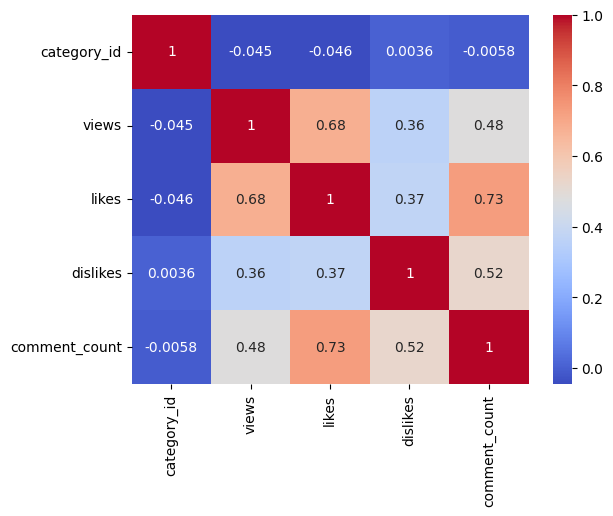

In [46]:
#Correlation plots. First for "data"

#Select only float columns:
int_columns = data.select_dtypes(include = ["float"])

#Calculate the correlation matrix
correlation_matrix = int_columns.corr()

#plotting as a heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

<AxesSubplot:>

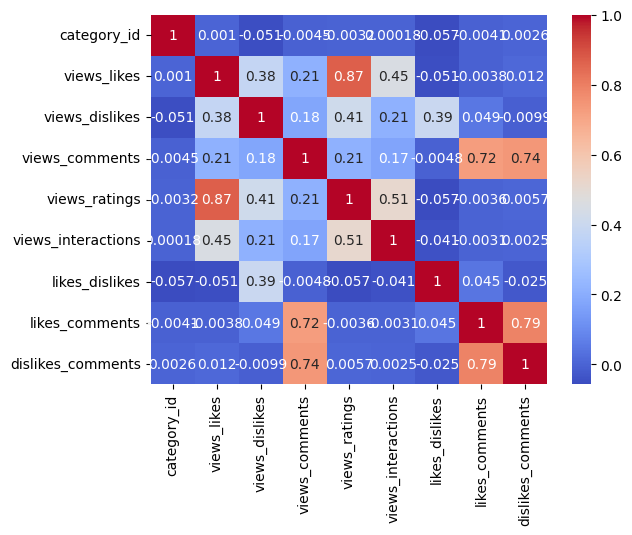

In [47]:
#Now for ratio_data
#Select only float columns:
int_columns = ratio_data.select_dtypes(include = ["float"])

#Calculate the correlation matrix
correlation_matrix = int_columns.corr()

#plotting as a heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

In [48]:
#Category_id is in fact a categorical variable. So, in order to see the correlation with other features
#it has to be encoded using one-hot technique

encoded_data = pd.concat([data, pd.get_dummies(data["category_id"], prefix = "category")], axis = 1)

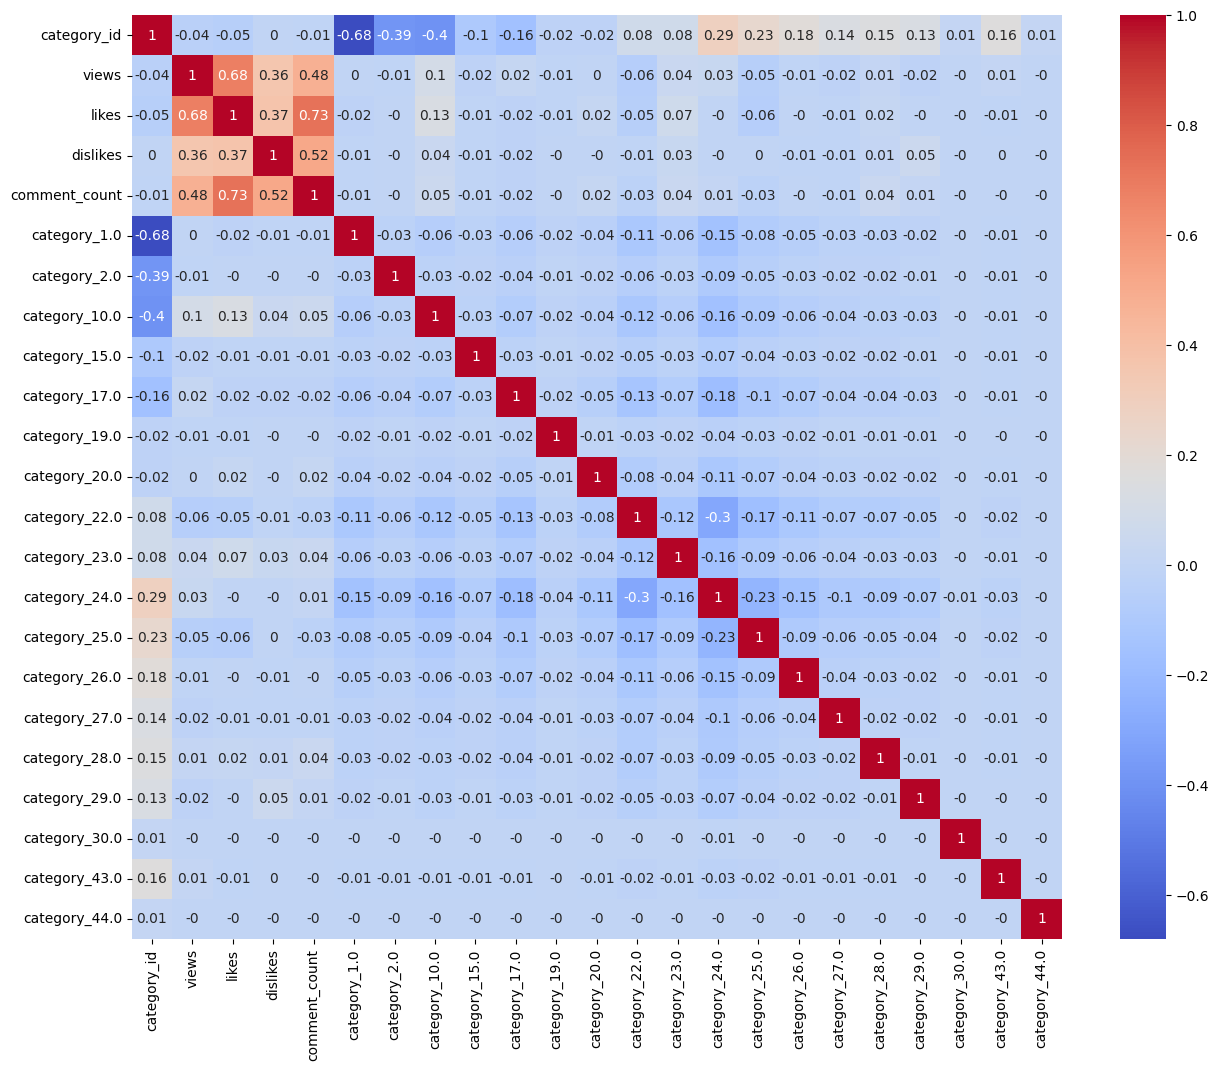

In [49]:
corr =  encoded_data.corr(method = "pearson").round(2)

fig, ax = plt.subplots(figsize = (15,12))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

In [50]:
#Same to ratio_data
encoded_data = pd.concat([ratio_data, pd.get_dummies(ratio_data["category_id"], prefix = "category")], axis = 1)

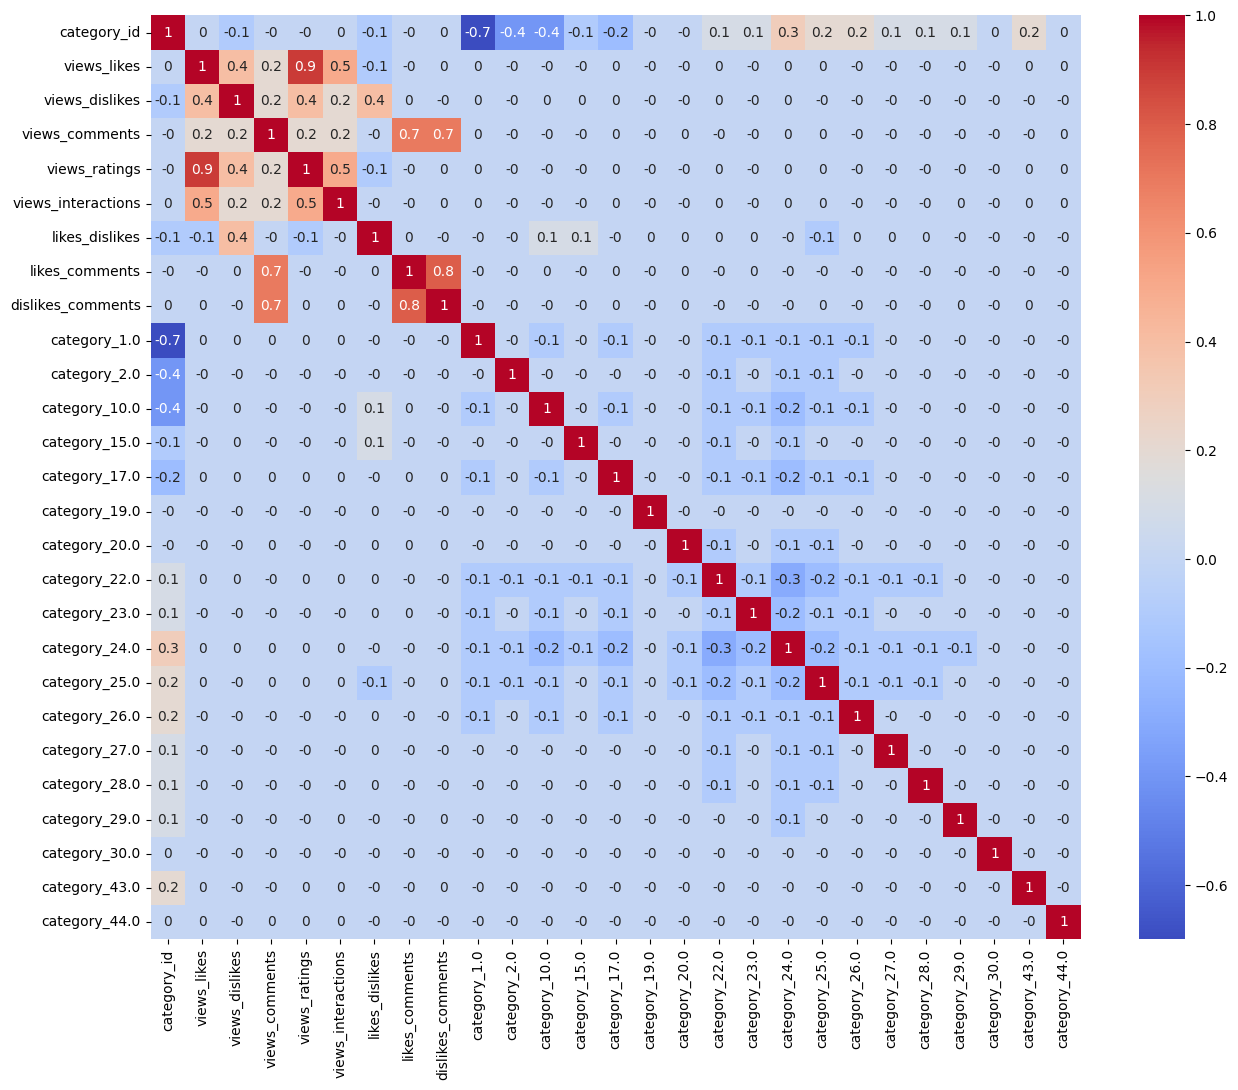

In [51]:
corr =  encoded_data.corr(method = "pearson").round(1)

fig, ax = plt.subplots(figsize = (15,12))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

## Ehhhhh... Bad news jajaja

It seems that category_id is not very correlated with features in data and ratio_data, so, probably a machine learning model in that way can not be very accurate. Where there is in fact some correlations are in features as likes, dislikes, views and comments. So, probably one of those features can be predicted using the others as inputs. For example, predicting the views based in likes, dislikes and comments. 

But that makes me sad because I really wanted to predict the category_id label :(

In [52]:
data_int_columns = data[["category_id", "views", "likes", "dislikes", "comment_count"]]
data_int_columns

,category_id,views,likes,dislikes,comment_count
0,24.0,31052.0,36.0,11.0,2.0
1,27.0,68027.0,4963.0,169.0,477.0
2,24.0,30914.0,483.0,77.0,81.0
3,15.0,4822.0,694.0,4.0,34.0
4,20.0,309197.0,3837.0,516.0,278.0
...,...,...,...,...,...
184280,22.0,561824.0,100106.0,429.0,13454.0
184281,22.0,20389.0,1848.0,73.0,392.0
184282,28.0,62134.0,4984.0,107.0,664.0
184283,25.0,3413.0,172.0,4.0,70.0


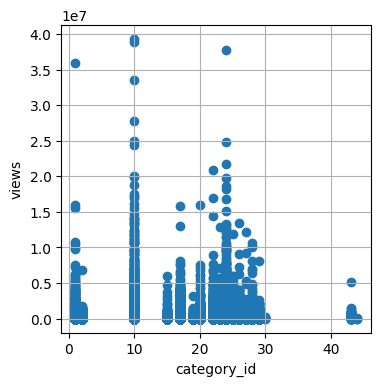

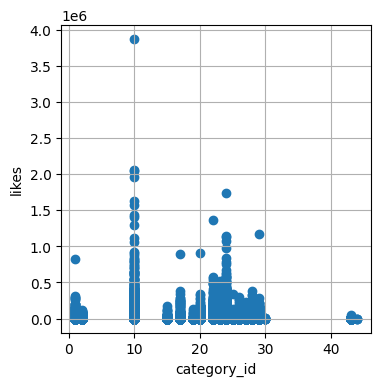

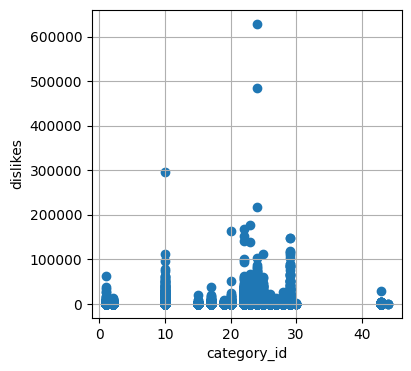

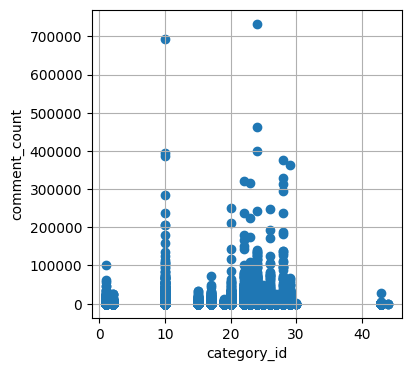

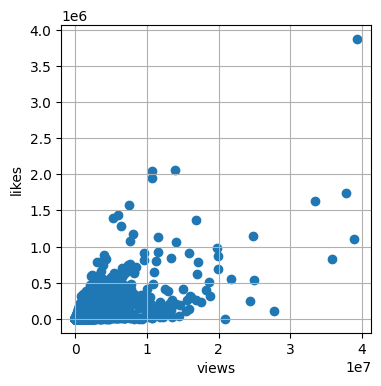

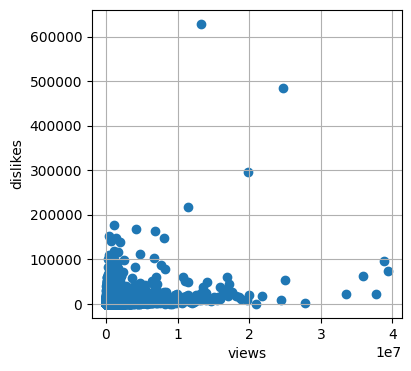

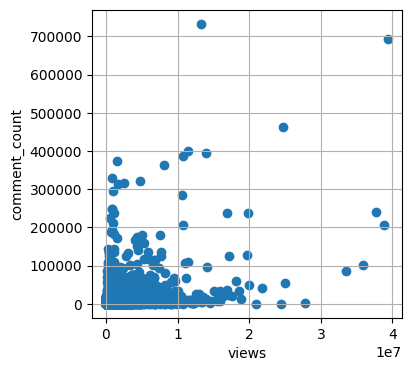

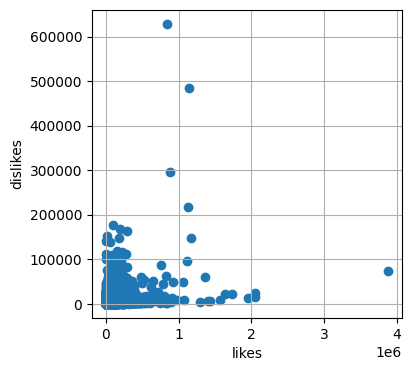

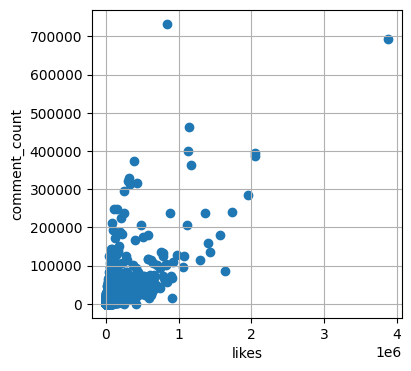

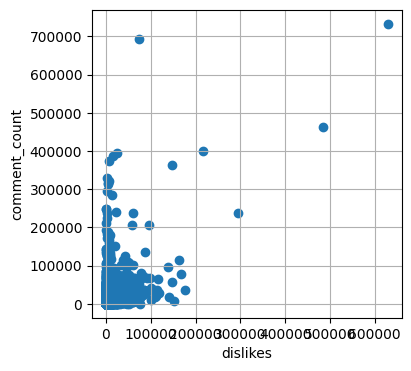

In [53]:
for i in range(len(data_int_columns.columns)):
    for j in range(i,len(data_int_columns.columns)):
        
        if i == j:
            pass
        else:

            fig, ax = plt.subplots(figsize = (4,4), facecolor = "white")
            plt.scatter(data_int_columns[data_int_columns.columns[i]], data_int_columns[data_int_columns.columns[j]])
            plt.xlabel(data_int_columns.columns[i])
            plt.ylabel(data_int_columns.columns[j])
            plt.grid()

            plt.show()

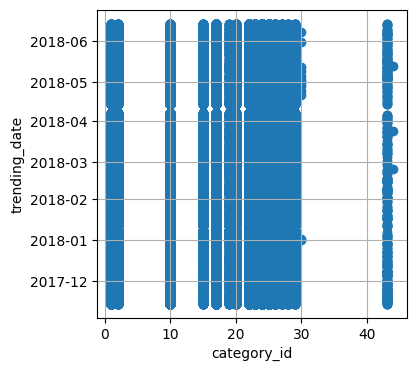

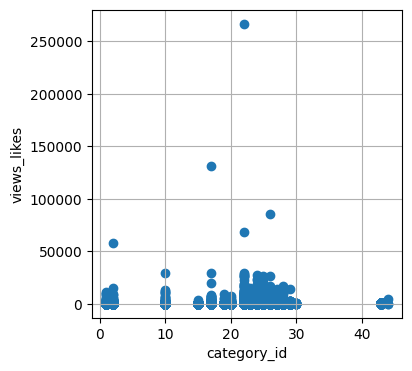

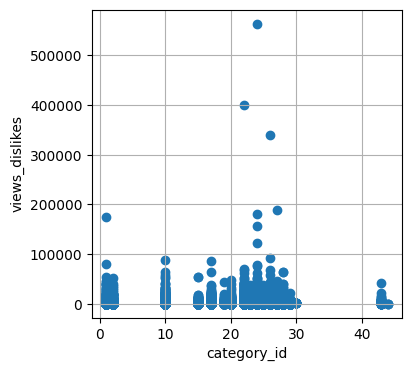

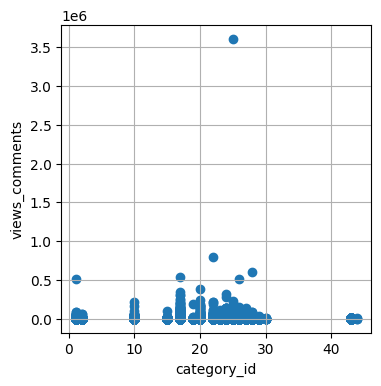

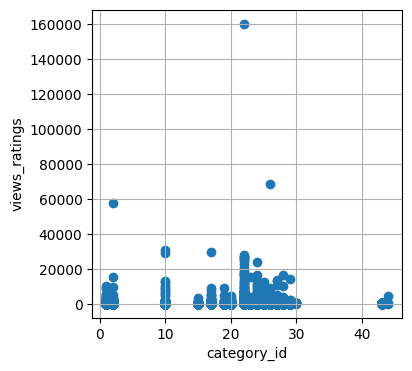

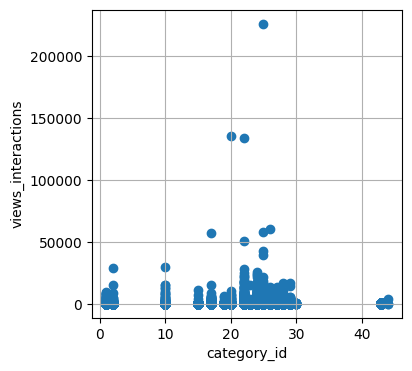

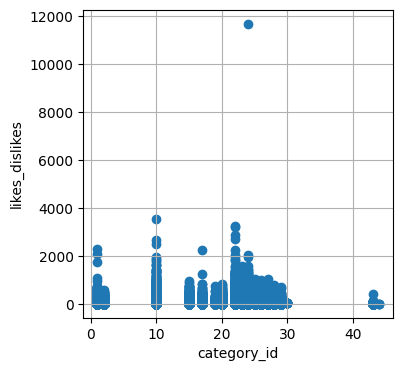

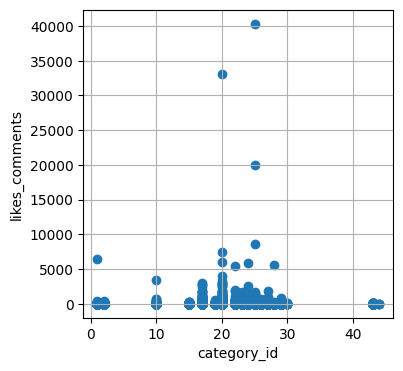

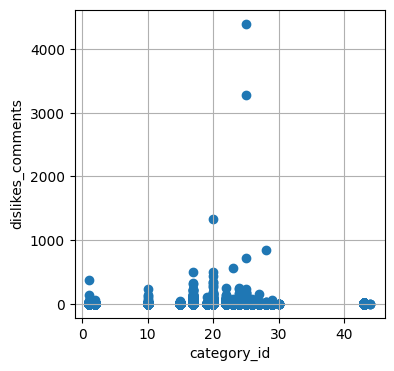

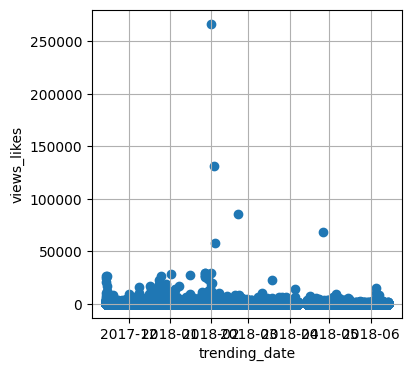

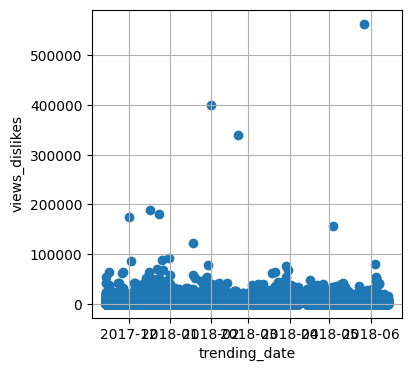

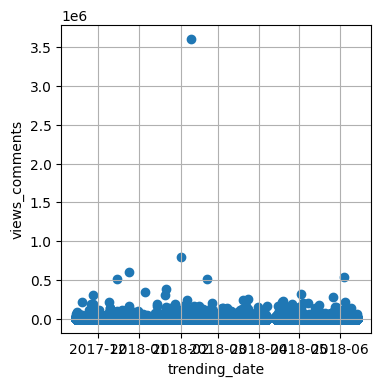

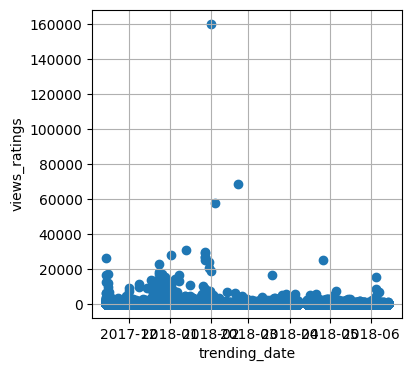

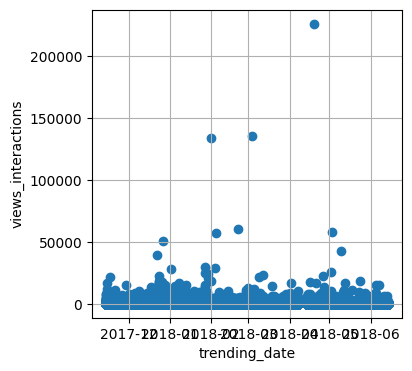

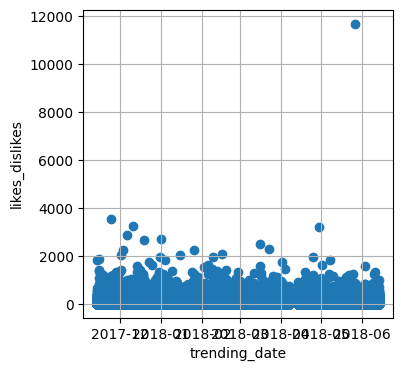

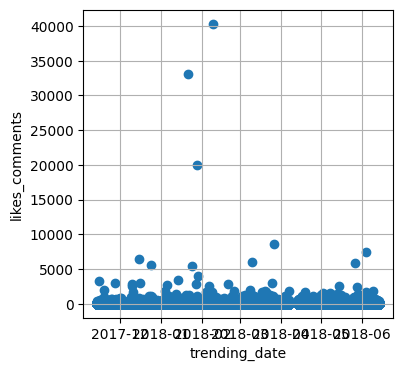

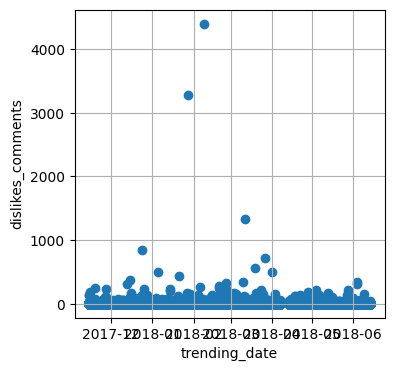

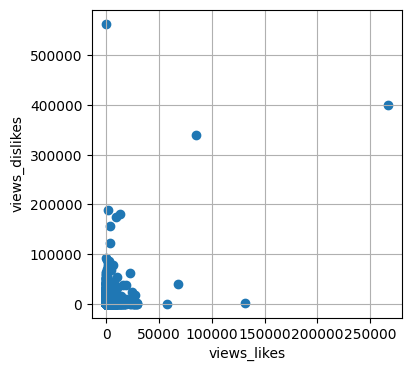

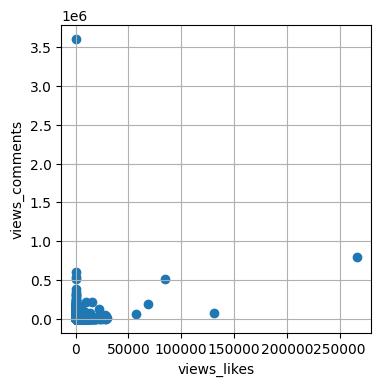

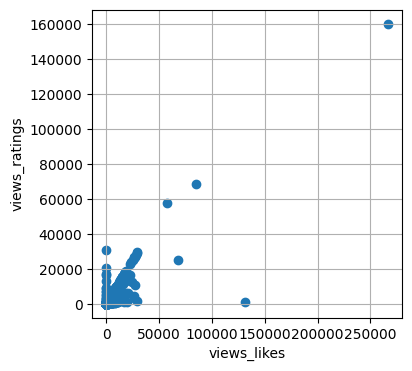

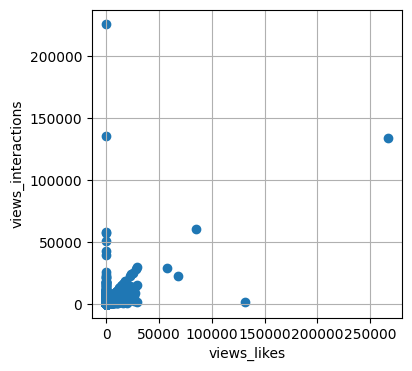

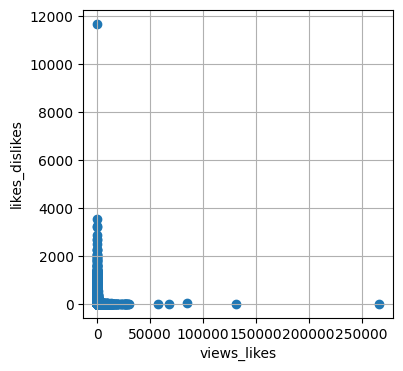

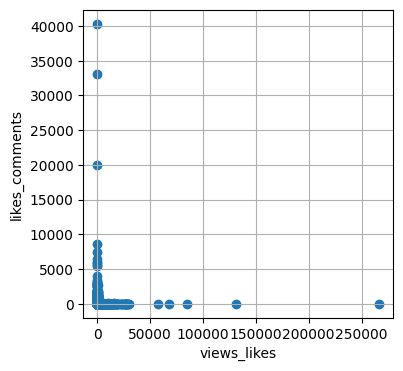

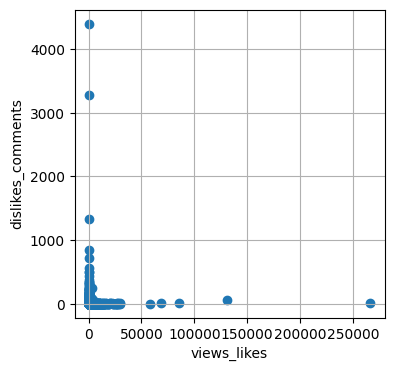

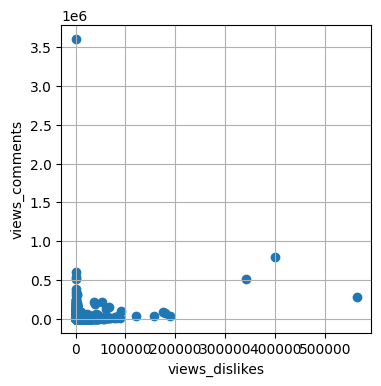

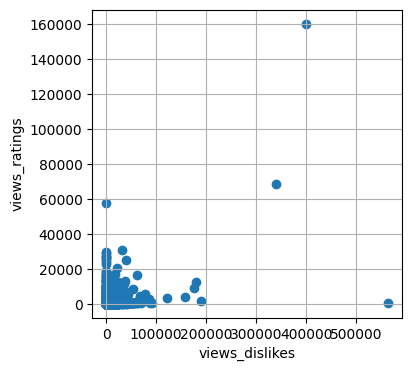

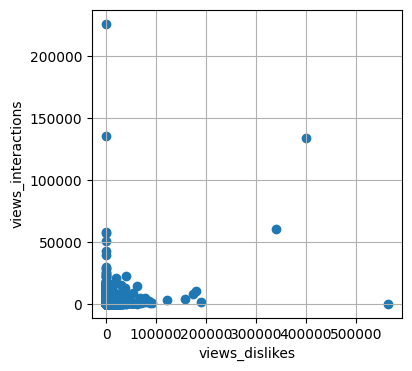

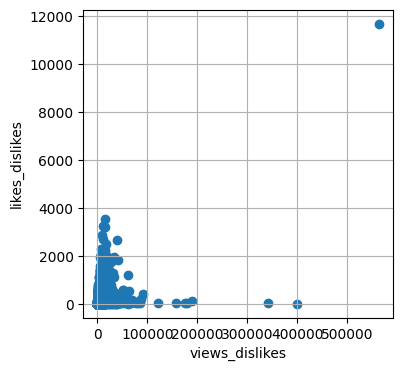

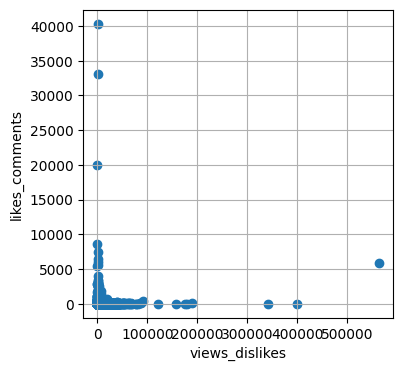

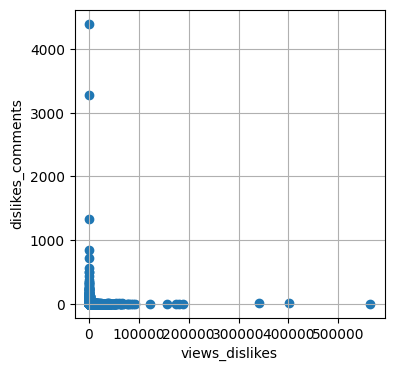

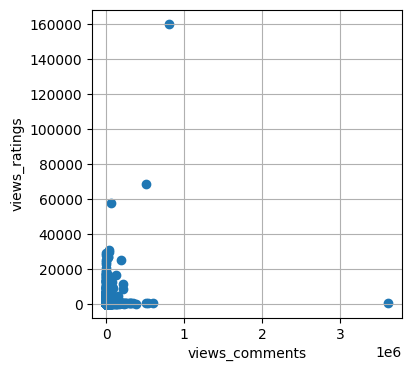

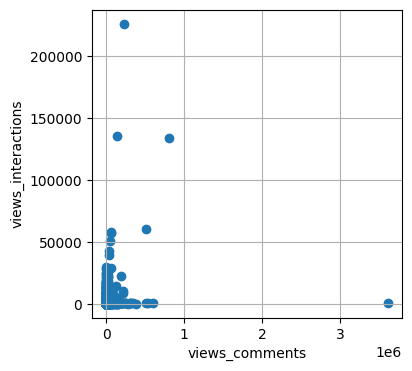

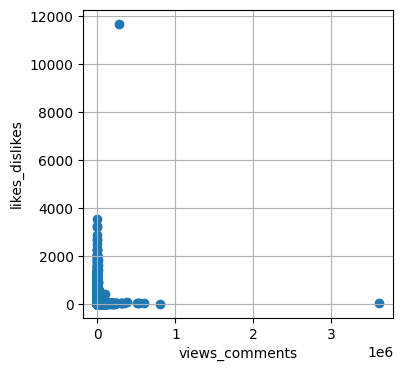

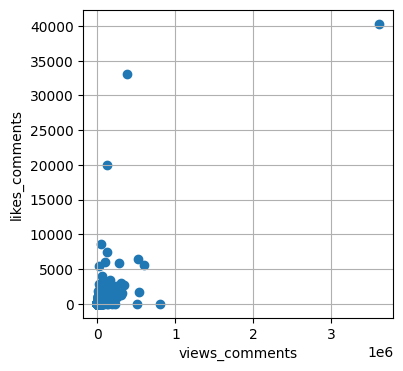

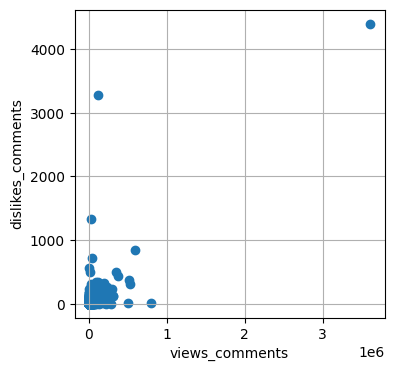

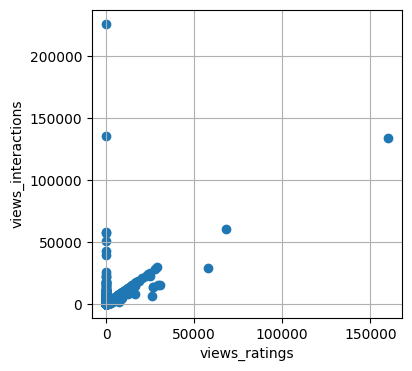

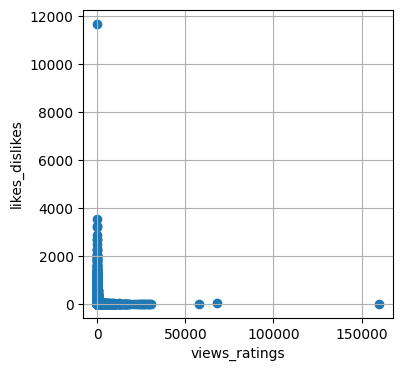

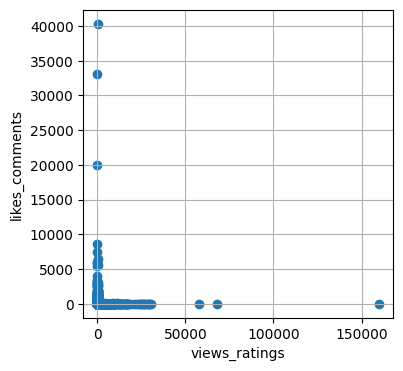

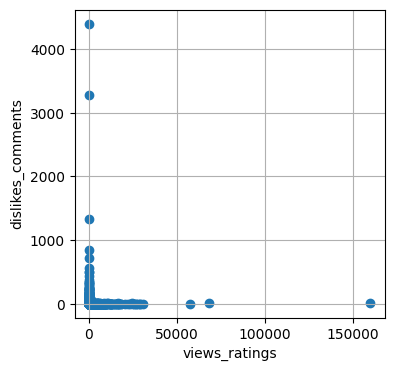

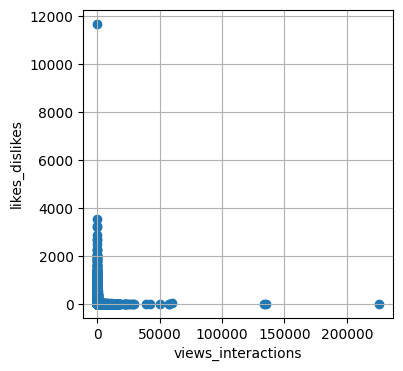

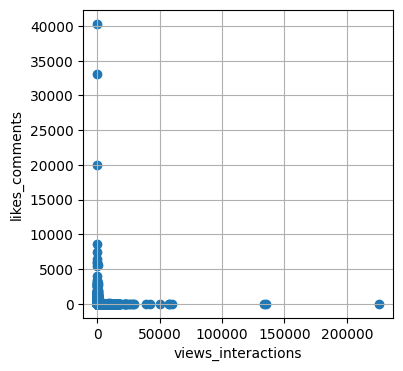

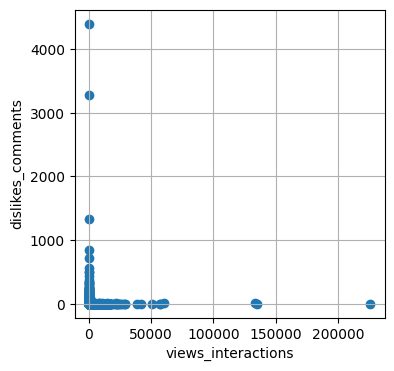

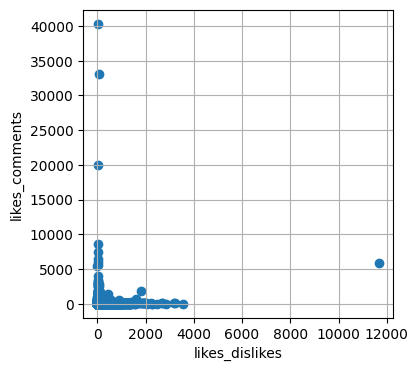

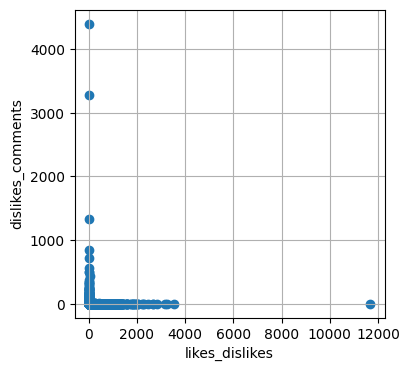

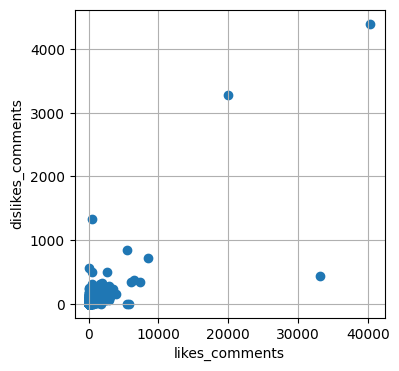

In [54]:
for i in range(len(ratio_data.columns)):
    for j in range(i,len(ratio_data.columns)):
        
        if i == j:
            pass
        else:

            fig, ax = plt.subplots(figsize = (4,4), facecolor = "white")
            plt.scatter(ratio_data[ratio_data.columns[i]], ratio_data[ratio_data.columns[j]])
            plt.xlabel(ratio_data.columns[i])
            plt.ylabel(ratio_data.columns[j])
            plt.grid()

            plt.show()

## POR EL MOMENTO LO DEJO HASTA AQUÍ.

Qué sigue: Gráficos, visualizaciones entre relaciones. Correlation plot. distribuciones. Y no sé que más. Una vez haya hecho eso tanto para data como para ratio_data, sigue crear modelos de machine learning.

La idea es realizar 4.5 cosas.

1.- Modelos de machine learning sobre el dataset "data" para intentar predecir el label "category_id" 

2.- Modelos de machine learning sobre el dataset "ratio_data" para intentar predecir el label "category_id"

2.5.- Comparar modelos.

3.- Modelos de Deep Learning para predecir "category_id" basado en cadenas de texto: NLP. Utilizar variables como el título, descripción, tags y no me acuerdo qué otra más había, para intentar predecir category_id. Finalmente. Comparar machine learning vs deep learning. 

4.- Ya mandar la wea que salga nomais al curso y sacar el certificado.

## Data Scaling

for both: data_int_columns and ratio_data

In [55]:
from sklearn.preprocessing import MinMaxScaler

columnas = ["views" ,"likes", "dislikes", "comment_count"]

x = data_int_columns[columnas]
y = data_int_columns["category_id"]

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)

data_scaled = pd.DataFrame(x_scaled, columns = columnas)
data_scaled["category_id"] = y

data_scaled

,views,likes,dislikes,comment_count,category_id
0,0.000786,0.000009,0.000017,0.000003,24.0
1,0.001726,0.001279,0.000269,0.000650,27.0
2,0.000783,0.000124,0.000122,0.000110,24.0
3,0.000120,0.000179,0.000006,0.000046,15.0
4,0.007855,0.000989,0.000820,0.000379,20.0
...,...,...,...,...,...
184280,0.014275,0.025800,0.000682,0.018345,22.0
184281,0.000515,0.000476,0.000116,0.000535,22.0
184282,0.001576,0.001285,0.000170,0.000905,28.0
184283,0.000084,0.000044,0.000006,0.000095,25.0


In [56]:
columnas = ["views_likes" ,"views_dislikes", "views_comments", "views_ratings", "views_interactions", "likes_dislikes", "likes_comments", "dislikes_comments"]

x = ratio_data[columnas]
y = ratio_data["category_id"]

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)

ratio_data_scaled = pd.DataFrame(x_scaled, columns = columnas)
ratio_data_scaled["category_id"] = y

ratio_data_scaled

,views_likes,views_dislikes,views_comments,views_ratings,views_interactions,likes_dislikes,likes_comments,dislikes_comments,category_id
0,0.003234,0.005005,0.004298,0.004128,0.002804,0.000280,0.000446,0.001249,24.0
1,0.000051,0.000714,0.000039,0.000083,0.000054,0.002513,0.000258,0.000080,27.0
2,0.000240,0.000712,0.000106,0.000345,0.000213,0.000537,0.000148,0.000216,24.0
3,0.000026,0.002137,0.000039,0.000043,0.000029,0.014844,0.000506,0.000027,15.0
4,0.000302,0.001062,0.000308,0.000444,0.000295,0.000636,0.000342,0.000421,20.0
...,...,...,...,...,...,...,...,...,...
184280,0.000021,0.002322,0.000012,0.000035,0.000022,0.019965,0.000184,0.000007,22.0
184281,0.000041,0.000495,0.000014,0.000066,0.000039,0.002166,0.000117,0.000042,22.0
184282,0.000047,0.001030,0.000026,0.000076,0.000048,0.003985,0.000186,0.000037,28.0
184283,0.000074,0.001513,0.000013,0.000121,0.000061,0.003679,0.000061,0.000013,25.0


## Logistic Regression
For both: data_int_columns and ratio_Data

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data_scaled.drop("category_id", axis = 1)
y = data_scaled["category_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Exactitud del modelo: {:.2f}%".format(score * 100))

Exactitud del modelo: 28.61%


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = ratio_data_scaled.drop("category_id", axis = 1)
y = ratio_data_scaled["category_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Exactitud del modelo: {:.2f}%".format(score * 100))

Exactitud del modelo: 28.57%


## Random Forest:
For both

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

X = data_scaled.drop("category_id", axis = 1)
y = data_scaled["category_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo de Random Forest: {:.2f}".format(accuracy))

Exactitud del modelo de Random Forest: 0.31


In [60]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

X = ratio_data_scaled.drop("category_id", axis = 1)
y = ratio_data_scaled["category_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo de Random Forest: {:.2f}".format(accuracy))

Exactitud del modelo de Random Forest: 0.30


## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

X = data_scaled.drop("category_id", axis = 1)
y = data_scaled["category_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Decision Tree: {:.2f}%".format(acc * 100))

Precisión del modelo de Decision Tree: 21.29%


In [62]:
from sklearn.tree import DecisionTreeClassifier

X = ratio_data_scaled.drop("category_id", axis = 1)
y = ratio_data_scaled["category_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Decision Tree: {:.2f}%".format(acc * 100))

Precisión del modelo de Decision Tree: 18.65%


## Support Vector Machine

It takes so much time so just pass it

## Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

X = data_scaled.drop("category_id", axis = 1)
y = data_scaled["category_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Exactitud:", accuracy)

Exactitud: 0.08964375830914073


In [64]:
from sklearn.naive_bayes import GaussianNB

X = ratio_data_scaled.drop("category_id", axis = 1)
y = ratio_data_scaled["category_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Exactitud:", accuracy)

Exactitud: 0.06858941313726022


## Well... it seems that the best model option is random forest. Lets try to increment the accuracy using GridSearch

Note: I convert the below cell to rawNB because it takes time to execute, and sometimes when I run the notebook I just use "Run all"

## Lets build a Deep learning model to try to predict "category_id" but using "title, channel_title, tags and description".

In [65]:
#Creating a dataframe with the label and the strings columns
df_deep = data[["category_id", "title", "channel_title", "tags", "description"]]

## I already tried to build a neural network but I had memory issues. Im going to filter de dataframe to just channels that are trending in US (df[0])

In [66]:
#Taking videos that were in trending on USA, CA and GB. Because its more probably that the channels are in english :)
lista = list(np.unique(df[0]["channel_title"].dropna())) + list(np.unique(df[1]["channel_title"].dropna())) + list(np.unique(df[4]["channel_title"].dropna()))
lista = list(np.unique(lista))

In [67]:
for i in range(len(lista)):
    print(lista[i], ":" ,i)

 & trying new things and adventures in new lands!  : 0
 2018. (Joel Bissell | MLive.com)" : 1
 Ali Abbas : 2
 Ali Abbas as Kamran : 3
 Brie Larson : 4
 Carole Middleton : 5
 Farah Zeba : 6
 Junaid Khan : 7
 Lorenzo’s : 8
 Michigan; 19-year-old Syrian refugee and advocate for girls' education Muzoon Almellehan; and 18-year-old model : 9
 Project Pat & more!  Available NOW exclusively on DatPiff! : 10
 USA : 11
 Zedd's Grammy sits next to a poop emoji. : 12
 a Warner Bros. Entertainment Company : 13
 adding : 14
 and Meghan Markle | The New Yorker" : 15
 and Prince Harry : 16
 and Reddit | GQ" : 17
 and a few that no one knows about! Make sure you say hello and hit the subscribe button : 18
 and culture.Astronaut Chris Hadfield Debunks Space Myths | WIRED" : 19
 and culture.How Black Panther's Visual Effects Were Made | WIRED" : 20
 and culture.James Cameron Answers Sci-Fi Questions From Twitter | Tech Support | WIRED" : 21
 and culture.James Cameron Answers Sci-Fi Questions From Twitter

In [68]:
lista = lista[195:6800]

In [69]:
df_deep_filtered = df_deep[df_deep["channel_title"].isin(lista)]
df_deep_filtered = df_deep_filtered.reset_index(drop=True)
df_deep_filtered 

,category_id,title,channel_title,tags,description
0,20.0,PlayStation E3 2018 Showcase | English,PlayStation Europe,"""playstation""|""playstation 4""|""playstation eur...",Show starts at 1:13:20.E3 2018 has arrived. Jo...
1,25.0,"Responding to ALL The Outrage, Ridiculous H3H3...",Philip DeFranco,"""Elizabeth Hurley""|""Instagram""|""Outrage""|""scan...","Thanks for tuning in this week, ya Beautiful B..."
2,17.0,صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,RedsTech,"""RedsTech""|""bein sports""|""ريال مدريد""|""real ma...",I للتواصل معنا Ihttps://www.facebook.com/RedsT...
3,10.0,Jessie Reyez - Body Count,JessieReyezVEVO,"""Jessie""|""Reyez""|""Body""|""Count""|""Island""|""Reco...",Music video by Jessie Reyez performing Body Co...
4,1.0,AVENGERS 3 - Bonjour spoilers (duh),Le Fossoyeur de Films,"""fossoyeur""|""cinéma""|""film""|""avengers""|""infini...",Le Capitaine du Nexus VI se joint à moi pour b...
...,...,...,...,...,...
39428,24.0,Budweiser | Beer Country | :60,Budweiser,"""Budweiser""|""Super Bowl""|""Clydesdales""|""Bud""|""...",This is a story bigger than beer. It’s a story...
39429,24.0,DANS LES PASSAGES SECRETS D'UNE CATHÉDRALE !,Mamytwink,"""Cathédrale de Metz""""|""""Mamytwink""""|""""Explorat...",On nous a confié la clef qui ouvre toutes les ...
39430,25.0,Our World in 2018: DISTURBING VIDEO!,Jason A,"""jason a""|""news""|""2018""",They aren't Telling Us Something! (2018-2019)F...
39431,1.0,ANT-MAN AND THE WASP Trailer # 2 TEASER (NEW 2...,ONE Media,"""Cinema|""""Trailer""""|""""Official""""|""""Movie""""|""""F...",ANT-MAN AND THE WASP Trailer # 2 TEASER (NEW 2...


In [70]:
df_deep_filtered, df_deep_filtered_sample = train_test_split(df_deep_filtered, test_size=0.2, random_state=42)
df_deep_filtered = df_deep_filtered.reset_index(drop = "True")
df_deep_filtered_sample = df_deep_filtered_sample.reset_index(drop = "True")

In [71]:
import keras
import tensorflow
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2


X = df_deep_filtered[['channel_title', 'title', "description"]]
y = df_deep_filtered['category_id']

# Codificar la columna 'category_id'
le_category_id = LabelEncoder()
y = le_category_id.fit_transform(y)


ct = ColumnTransformer([
        ("onehot", OneHotEncoder(), ['channel_title']),
        ("count", CountVectorizer(), 'title'),
        ("count_desc", CountVectorizer(), "description")
    ])

X_encoded = ct.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [72]:
# Definir la estructura de la red neuronal
model = keras.Sequential([
    layers.Dense(16, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    layers.Dense(len(np.unique(y)), activation='softmax')

])

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
789/789 [==============================] - 60s 74ms/step - loss: 1.2752 - accuracy: 0.7393 - val_loss: 0.9665 - val_accuracy: 0.8193
Epoch 2/5
789/789 [==============================] - 62s 78ms/step - loss: 0.7989 - accuracy: 0.8716 - val_loss: 0.9350 - val_accuracy: 0.8420
Epoch 3/5
789/789 [==============================] - 63s 80ms/step - loss: 0.7265 - accuracy: 0.8962 - val_loss: 0.9288 - val_accuracy: 0.8471
Epoch 4/5
789/789 [==============================] - 64s 82ms/step - loss: 0.6873 - accuracy: 0.9076 - val_loss: 0.9496 - val_accuracy: 0.8453
Epoch 5/5
789/789 [==============================] - 65s 82ms/step - loss: 0.6546 - accuracy: 0.9159 - val_loss: 0.9665 - val_accuracy: 0.8391


In [73]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

198/198 [==============================] - 2s 10ms/step - loss: 0.9665 - accuracy: 0.8391
Loss: 0.9665330052375793
Accuracy: 0.839144229888916


In [74]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis = 1)

df_test = pd.DataFrame()
df_test["test_values"] = y_test
df_test["predicted_values"] = y_pred_argmax

df_test

198/198 [==============================] - 1s 3ms/step


,test_values,predicted_values
0,7,7
1,7,7
2,9,9
3,10,10
4,9,9
...,...,...
6305,6,8
6306,11,11
6307,2,2
6308,9,9


In [75]:
original_y = le_category_id.inverse_transform(y)
category_id_mapping = list(zip(original_y, y))

set(category_id_mapping)

{(1.0, 0),
 (2.0, 1),
 (10.0, 2),
 (15.0, 3),
 (17.0, 4),
 (19.0, 5),
 (20.0, 6),
 (22.0, 7),
 (23.0, 8),
 (24.0, 9),
 (25.0, 10),
 (26.0, 11),
 (27.0, 12),
 (28.0, 13),
 (29.0, 14),
 (43.0, 15)}

## Evaluating the model with new data that the model has not seen

In [76]:
X_prueba = df_deep_filtered_sample[['channel_title', "title", "description"]]
y_prueba = df_deep_filtered_sample['category_id']

# Codificar la columna 'category_id'
le_category_id_prueba = LabelEncoder()
y_prueba = le_category_id_prueba.fit_transform(y_prueba)

ct_prueba = ColumnTransformer([
        ("onehot", OneHotEncoder(), ['channel_title']),
        ("count", CountVectorizer(), 'title'),
        ("count_desc", CountVectorizer(), "description")
    ])

X_prueba_encoded = ct_prueba.fit_transform(X_prueba)

In [77]:
y_pred_prueba = model.predict(X_prueba_encoded)
y_pred_prueba_argmax = np.argmax(y_pred_prueba, axis = 1)

df_test = pd.DataFrame()
df_test["test_values"] = y_prueba
df_test["predicted_values"] = y_pred_prueba_argmax

df_test

247/247 [==============================] - 1s 3ms/step


,test_values,predicted_values
0,4,7
1,9,13
2,0,10
3,2,9
4,9,7
...,...,...
7882,9,7
7883,12,2
7884,13,13
7885,7,7


In [78]:
correct = 0
for i in range(len(df_test)):
    if df_test["test_values"][i] == df_test["predicted_values"][i]:
        correct += 1

accuracy = correct/len(df_test)
accuracy

0.1885381006719919